# twitter sentiment analysis

In [1]:
#import various libraries which i will use in this project
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
#loading the data into variables for processing it
train  = pd.read_csv(r'C:\Users\HP\Documents\twitter sentiment analysis\twitter_train_data.csv')
test = pd.read_csv(r'C:\Users\HP\Documents\twitter sentiment analysis\twitter_test_data.csv')

In [3]:
#printing the data so that we can understand what we are working with clearly(non negative)
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
#now lets see some negative data which is present
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


## data cleaning will start from here

In [5]:
#combining datasets
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [7]:
#here i have filtered all the tweets from the datasets as they are just noise in sentiment analysis
combi['tidy_tweet'] = combi['tweet'].apply(lambda x: remove_pattern(x, r"@[\w]+"))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [9]:
#here im removing shortwords from the datasets which are words which doesn't hold any value in sentiment analysis eg-is,the,in,etc
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
#here im tokenizing the tweets into the output form
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [11]:
#here im doing the stemming i.e reducing the words like running to run 
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [12]:
#here im stiching the data back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

### now i will create some wordcloud to understand what words are being used the most and get some insite

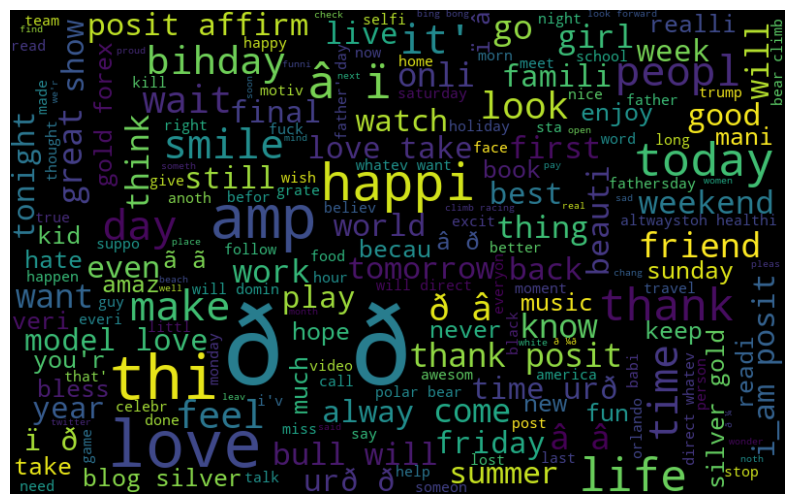

In [13]:
#here i have created the word cloud and the words which appear most are bigger in size
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

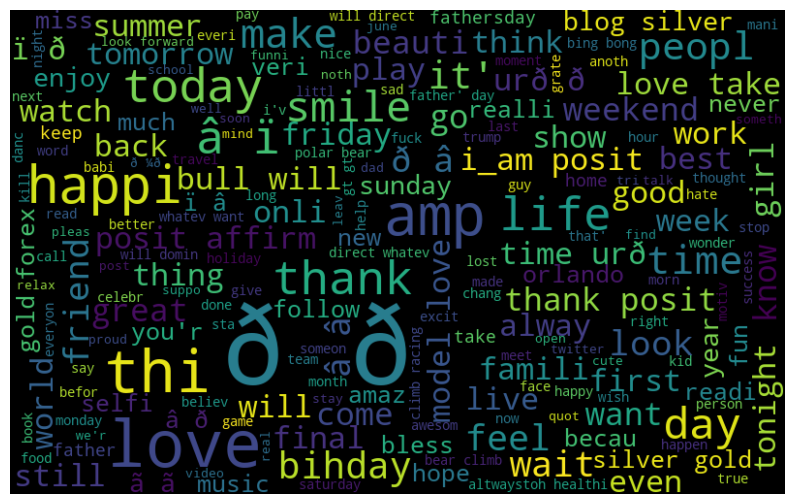

In [14]:
#here are some positive words which are appearing the most
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

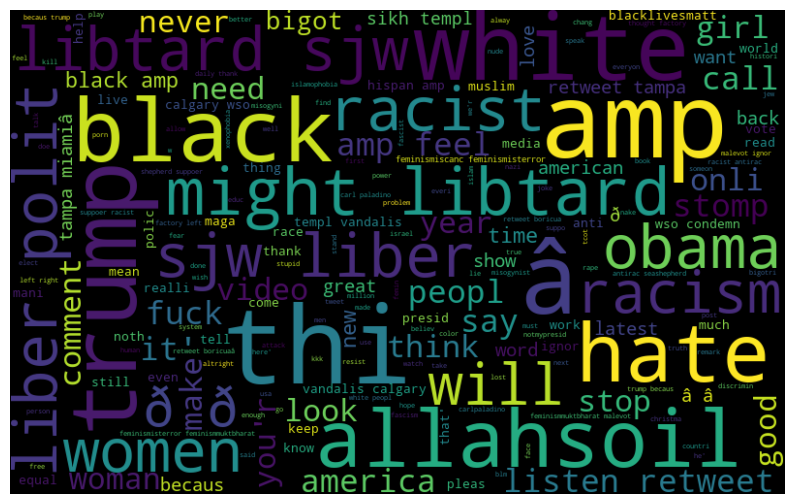

In [15]:
#now here are some negative words which appear
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
##here i will store different sentiments of tweets in different dataframes so that we can create chart which will give us some great understanding

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

C:\Users\HP\AppData\Local\Temp\ipykernel_16112\3806796365.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=d,y="Hashtag",x="Count",palette="viridis",legend=False)


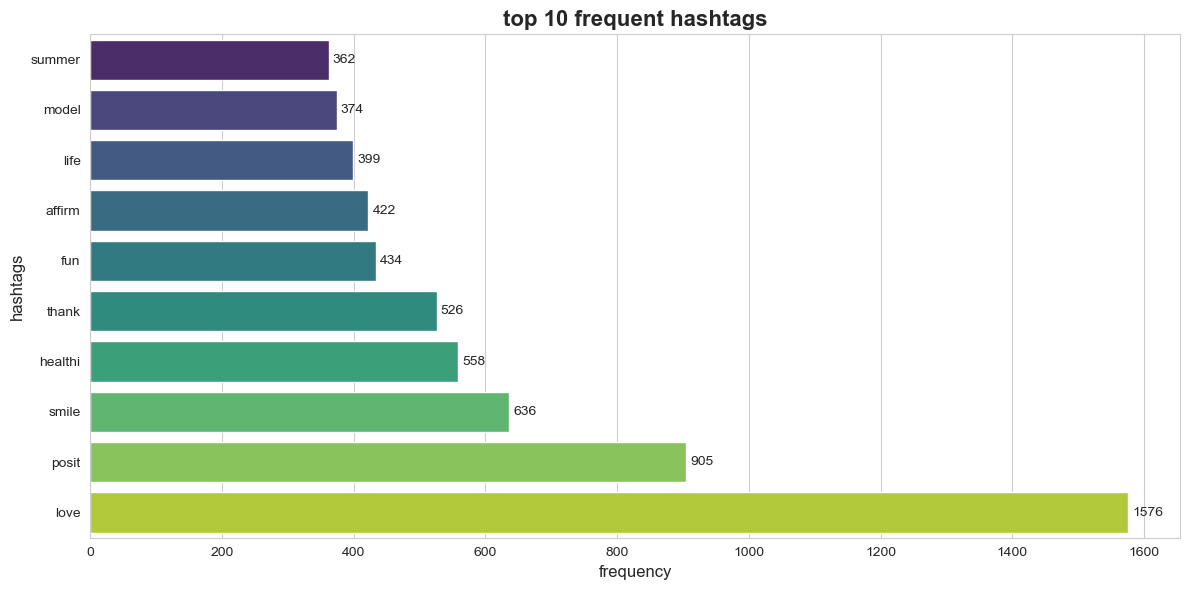

In [17]:
#now i will create a chart for non negative words and how many times they appear
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())})
d=d.nlargest(n=10,columns="Count")

d=d.sort_values("Count",ascending=True)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax=sns.barplot(data=d,y="Hashtag",x="Count",palette="viridis",legend=False)
for i in ax.containers:
    ax.bar_label(i,padding=3)

plt.title("top 10 frequent hashtags", fontsize=16,fontweight='bold')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("hashtags",fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16112\3257607422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=d,y="Hashtag",x="Count",palette="viridis",legend=False)


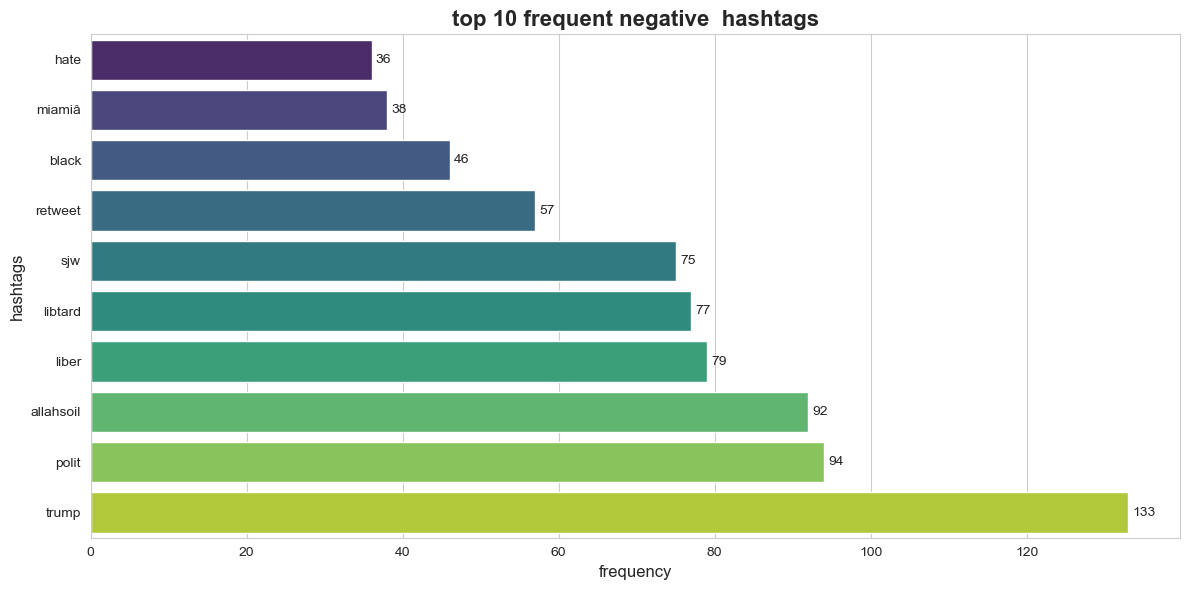

In [18]:
#now i will create a chart for negative words and how many times they appear
a=nltk.FreqDist(HT_negative)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())})
d=d.nlargest(n=10,columns="Count")

d=d.sort_values("Count",ascending=True)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax=sns.barplot(data=d,y="Hashtag",x="Count",palette="viridis",legend=False)
for i in ax.containers:
    ax.bar_label(i,padding=3)

plt.title("top 10 frequent negative  hashtags", fontsize=16,fontweight='bold')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("hashtags",fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
#bag of words features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

bow =bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [24]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

### now using logistic regression to build the model

In [21]:
#model using BOW
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

print("the models score using BOW is below")
f1_score(yvalid,prediction_int)

the models score using BOW is below


0.5461978740801309

In [22]:
#testing the model on the dataset we splited
test_pred=lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow',index=False)


In [25]:
# now using TF-IDF
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf,ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

print("f1 score of model using TF-IDF")
f1_score(yvalid,prediction_int)


f1 score of model using TF-IDF


0.5416666666666666